In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ticktack
from ticktack import fitting
import os
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

In [2]:
lat = [50 + 18/60, 48 + 43/60, 63 + 9/60, 48 + 48/60, 
      54 + 28/60, 40 + 6/60, 67 + 29/60, 31 + 7/60, 
      37 + 27/60, 30 + 20/60, 72 + 13/60, 35 + 57/60, 
      46 + 40/60, 69, 58 +38/60, 48 + 10/60,
      67 + 31/60, 37 + 77/60, 35 + 10/60, 68 + 15/60, 68.5]
events = ["Büntgen18_ALT01", "Büntgen18_GER01", 
          "Büntgen18_SWE05", "Büntgen18_GER07",
          "Büntgen18_CAN06", "Büntgen18_GRE02", 
          "Büntgen18_RUS04", "Büntgen18_TIB01",
          "Büntgen18_CHN01", "Büntgen18_JAP01", 
          "Büntgen18_RUS15", "Büntgen18_USA02",
          "Büntgen18_MON03", 
          "Büntgen18_RUS17", "Büntgen18_USA11",
          "Büntgen18_MON09", 
          "Büntgen18_RUS20", "Büntgen18_USA18",
          "Büntgen18_PAK04", 
          "Büntgen18_SWE02", "Uusitalo18_Pine"]
events_lat = dict(zip(events, lat))  

In [3]:
cbm_models = ["Guttler15", "Buntgen18", "Brehm21",]
steady_state = []
for cbm_model in cbm_models:
    sf = fitting.SingleFitter(cbm_model, cbm_model=cbm_model)
    steady_state.append(sf.steady_state_production)

INFO[2022-02-15 11:21:46,090]: Unable to initialize backend 'tpu_driver': Not found: Unable to find driver in registry given worker: 
INFO[2022-02-15 11:21:46,091]: Unable to initialize backend 'gpu': Not found: Could not find registered platform with name: "cuda". Available platform names are: Host Interpreter
INFO[2022-02-15 11:21:46,092]: Unable to initialize backend 'tpu': Invalid argument: TpuPlatform is not available.
WARNING[2022-02-15 11:21:46,093]: No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [4]:
Guttler14 = np.zeros((6000, len(events)))
Buntgen18 = np.zeros((6000, len(events)))
Brehm21 = np.zeros((6000, len(events)))

In [5]:
units = "atoms"
if units == "atoms":
    conversion = 1
else:
    conversion = 14.003242 / 6.022 * 5.11 * 31536. / 1e5 
for i, event in enumerate(events):
    Guttler14[:, i] = np.load("individual_chain/{}_Guttler15.npy".format(event))[:, 2] * conversion
for i, event in enumerate(events):
    Buntgen18[:, i] = np.load("individual_chain/{}_Buntgen18.npy".format(event))[:, 2] * conversion
for i, event in enumerate(events):
    Brehm21[:, i] = np.load("individual_chain/{}_Brehm21.npy".format(event))[:, 2] * conversion

In [6]:
Guttler14 = Guttler14 /  steady_state[0]
Buntgen18 = Buntgen18 /  steady_state[1]
Brehm21 = Brehm21 /  steady_state[2]

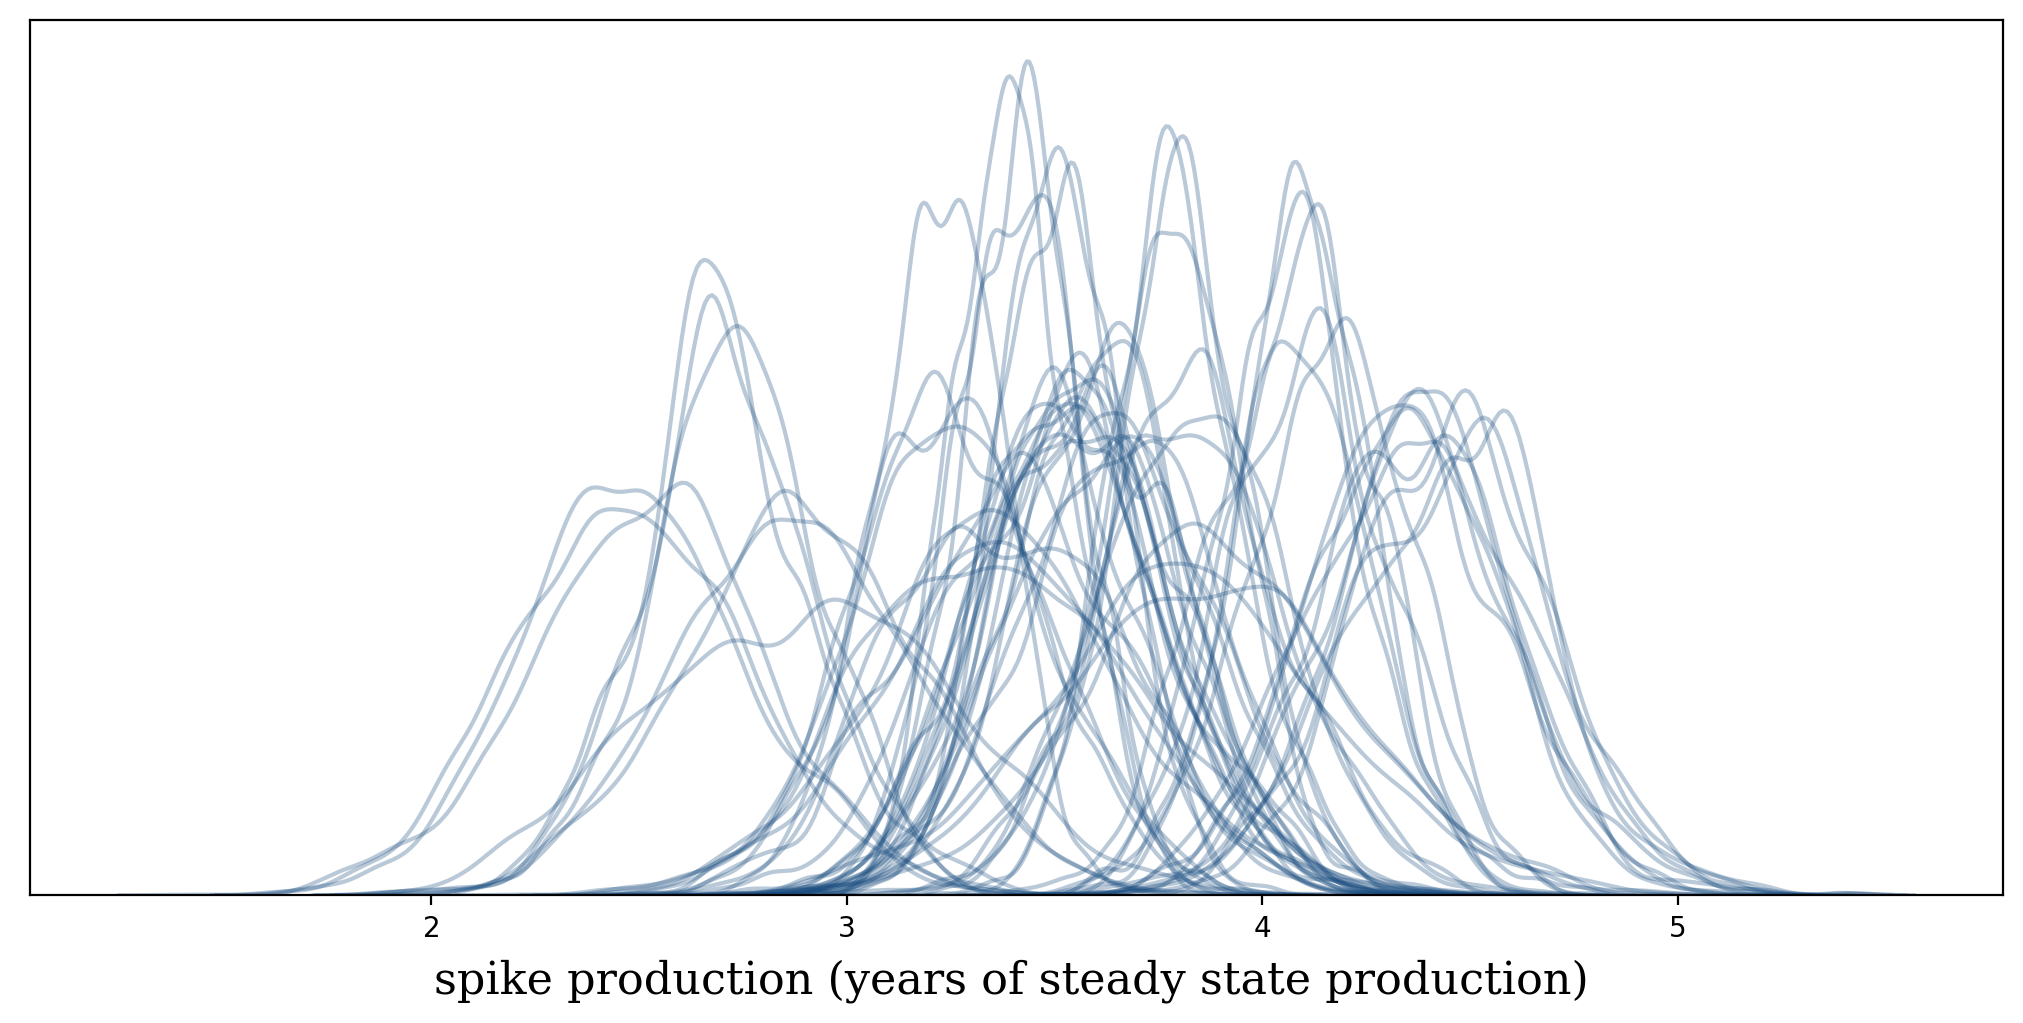

In [7]:
import seaborn as sns
fmt = ["-", "--", ":"]
fig = plt.figure(figsize=(10, 5), dpi=200, constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=1)
ax = fig.add_subplot(spec[0, 0])
for i in range(0, len(events)):
    sns.kdeplot(Guttler14[:, i], color = (0.1, 0.3, 0.5, 0.3), ax=ax, clip=(0, 15)); 
    sns.kdeplot(Buntgen18[:, i], color = (0.1, 0.3, 0.5, 0.3), ax=ax, clip=(0, 15)); 
    sns.kdeplot(Brehm21[:, i], color = (0.1, 0.3, 0.5, 0.3), ax=ax, clip=(0, 15));
ax.axes.yaxis.set_visible(False)
fig.supxlabel("spike production (years of steady state production)", fontsize=16, fontfamily="serif", fontweight="roman");

Text(65, 3.8, 'YAM')

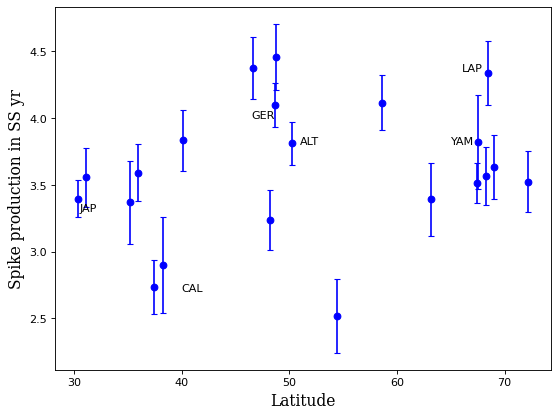

In [8]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(np.array(lat), np.mean(Guttler14, axis=0), yerr=np.std(Guttler14, axis=0), fmt="bo", capsize=3)
plt.xlabel("Latitude", fontfamily="serif", fontsize=14)
plt.ylabel("Spike production in SS yr", fontfamily="serif", fontsize=14)
plt.text(30.5, 3.3, "JAP")
plt.text(66, 4.35, "LAP")
plt.text(40, 2.7, "CAL")
plt.text(51, 3.8, "ALT")
plt.text(46.5, 4, "GER")
plt.text(65, 3.8, "YAM")